In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import imageio

In [2]:
def densificaRotulosParaVetorDeResposta(gabaritoDeRespostaDoTreino, numeroDeCategorias):
    quantidadeDeRespostas = gabaritoDeRespostaDoTreino.shape[0]
    
    print(quantidadeDeRespostas)
    
    intervaloDoIndice = np.arange(quantidadeDeRespostas) * numeroDeCategorias
    
    respostaCategorica = np.zeros((quantidadeDeRespostas, numeroDeCategorias))
    
    respostaCategorica.flat[intervaloDoIndice + gabaritoDeRespostaDoTreino.ravel()] = 1
    return respostaCategorica

In [3]:
def exibeImagemDaMatriz(imagemRedimensionada):
    plt.imsave('pic.png', imagemRedimensionada)
    # read the image
    im = plt.imread('pic.png')
    # show the image
    plt.imshow(im)
    #save the image array to binary file
    np.save('mypic', im)
    plt.show()

In [4]:
def salvaImagemDaMatriz(imagemRedimensionada):
    numeroMagico = np.random.randint(0,999)
    nomeDoArquivo = "imagem"+str(numeroMagico)+".png"
    plt.imsave(nomeDoArquivo, imagemRedimensionada)
    #np.save(nomeDoArquivo, im)
    

In [5]:
def salvaImagemGif(nomeDaImagem, colecaoImagens):
    imageio.mimwrite(nomeDaImagem, colecaoImagens,'gif')

In [6]:
def salvaConjuntoImagemGif(nomeDaColecao, colecaoDeGifs):
    for indice in range(colecaoDeGifs.shape[0]):
        nomeDoArquivo = nomeDaColecao + " - "+ str(indice)+".gif"
        salvaImagemGif(nomeDoArquivo,colecaoDeGifs[indice])

In [7]:
def abreImagemExemplo():
    imagem = imageio.imread('1.jpg','jpg')
    return imagem

In [8]:
dataTR = pd.read_csv('input/train.csv')
marcadorDoIndiceDeTreino = 0
imagens = dataTR.iloc[:,1:].values
imagens = imagens.astype(np.float)
gabaritoDeRespostaDoTreino = dataTR.iloc[:,0].values
numeroDeCategorias = 10
listaDeRespostaCategoricas = densificaRotulosParaVetorDeResposta(gabaritoDeRespostaDoTreino, numeroDeCategorias)

42000


In [9]:
numeroMagico = np.random.randint(0,750)
imagemRedimensionada = imagens[numeroMagico].reshape(28,28)
identificacaoDaImagem = gabaritoDeRespostaDoTreino[numeroMagico]

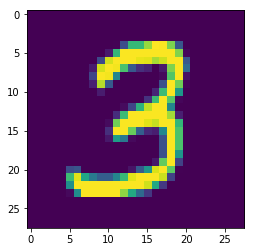

3


In [10]:
exibeImagemDaMatriz(imagemRedimensionada)
print(identificacaoDaImagem)

In [11]:
def geraFiltroAleatorioComTamanho(tamanhoDaJanela):
    filtro = np.random.rand(tamanhoDaJanela,tamanhoDaJanela)
    return filtro

In [12]:
def calculaProdutoEscalarMatrizesComTamanhoDaJanela( matriz1, matriz2, tamanhoDaJanela):
    valorEscalar = 0
    for i in range(matriz1.shape[0]):
        valorEscalar += np.dot(matriz1[i],matriz2[i])
    return valorEscalar

In [13]:
def relu(x):
    if x<0:
        return 0
    else:
        return x

In [14]:
def maxpollDaMatriz(matriz):
    return np.argmax(matriz)

In [15]:
def executaConvolucao (entradaDaConvolucao,tamanhoDaJanela):
    iteracaoColuna  = 0
    iteracaoLinha   = 0
    
    dimensaoXMatrizDeEntrada = int (entradaDaConvolucao.shape[0])
    dimensaoYMatrizDeEntrada = int (entradaDaConvolucao.shape[1])
    
    tamanhoXDaMatrizConvolucao = dimensaoXMatrizDeEntrada - tamanhoDaJanela
    tamanhoYDaMatrizConvolucao = dimensaoYMatrizDeEntrada - tamanhoDaJanela
    
    CamadaConvolucao    = np.zeros([tamanhoXDaMatrizConvolucao, tamanhoYDaMatrizConvolucao])
    
    filtro = geraFiltroAleatorioComTamanho(tamanhoDaJanela)
    
    for iteracaoLinha in range(tamanhoXDaMatrizConvolucao):
        for iteracaoColuna in range(tamanhoYDaMatrizConvolucao):
            
            fimDaColunaDaJanela = iteracaoColuna + tamanhoDaJanela
            fimDaLinhaDaJanela = iteracaoLinha + tamanhoDaJanela
            
            submatriz = entradaDaConvolucao [iteracaoLinha:fimDaLinhaDaJanela, iteracaoColuna: fimDaColunaDaJanela]
            
            valorPixelDaConvolucao = calculaProdutoEscalarMatrizesComTamanhoDaJanela(submatriz , filtro,tamanhoDaJanela)
            
            CamadaConvolucao [iteracaoLinha, iteracaoColuna] =  relu(valorPixelDaConvolucao)
    return CamadaConvolucao




In [16]:
def executaMaxpooling(matrizDeEntrada, tamanhoDaJanela, intervaloPorIteracao):
    dimensaoXMatrizDeEntrada = int (matrizDeEntrada.shape[0])
    dimensaoYMatrizDeEntrada = int (matrizDeEntrada.shape[1])
    tamanhoXDaMatrizMaxPolling = int((matrizDeEntrada.shape[0] - tamanhoDaJanela) + 1/intervaloPorIteracao)
    tamanhoYDaMatrizMaxPolling = int((matrizDeEntrada.shape[1] - tamanhoDaJanela) + 1/intervaloPorIteracao)
    

    
    matrizMaxPool = np.zeros([tamanhoXDaMatrizMaxPolling,tamanhoYDaMatrizMaxPolling])
    colunaMaxPool = 0
    linhaMaxPool  = 0

    for iteracaoLinha in range(0,tamanhoXDaMatrizMaxPolling ,intervaloPorIteracao):
        for iteracaoColuna in range(0, tamanhoYDaMatrizMaxPolling , intervaloPorIteracao):
            submatriz = matrizDeEntrada[ iteracaoLinha: iteracaoLinha + tamanhoDaJanela, iteracaoColuna: iteracaoColuna + tamanhoDaJanela ]
            matrizMaxPool[ iteracaoLinha,iteracaoColuna ] = int(np.argmax(submatriz))
    return matrizMaxPool

In [17]:
def obtemcuboConvolucional(entrada,quantidadeDefiltros,tamanhoDaJanela):
    cuboConvolucional =  []
    if (len(entrada.shape) > 2):
        for caracteristica in range(entrada.shape[0]):
            cubo = obtemcuboConvolucional(entrada[caracteristica],quantidadeDeFiltros,tamanhoDaJanela)
            cuboConvolucional.append(cubo)
    else:
        for i in range(quantidadeDefiltros):
            cuboConvolucional.append(executaConvolucao(entrada,tamanhoDaJanela))
    return cuboConvolucional

In [18]:
def obtemCuboMaxPooling(cuboConvolucional,tamanhoDaJanela,intervaloPorIteracao):
    cuboMaxPooling = []
    for i in range(cuboConvolucional.shape[0]):
        cuboMaxPooling.append(executaMaxpooling(cuboConvolucional[i], tamanhoDaJanela, intervaloPorIteracao))
    return cuboMaxPooling

In [19]:
imagemDeExemplo = abreImagemExemplo()
imagemDeExemploArray = np.asarray(imagemDeExemplo)

(618, 676)


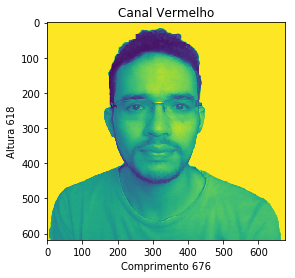

In [20]:
plt.title('Canal Vermelho')
plt.ylabel('Altura {}'.format(imagemDeExemplo.shape[0]))
plt.xlabel('Comprimento {}'.format(imagemDeExemplo.shape[1]))

plt.imshow(imagemDeExemplo[ : , : , 0])
print(imagemDeExemplo[ : , : , 0].shape)
salvaImagemDaMatriz(imagemDeExemplo[ : , : , 0])
plt.show()

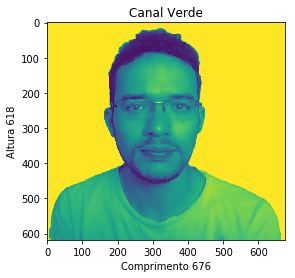

In [21]:
plt.title('Canal Verde')
plt.ylabel('Altura {}'.format(imagemDeExemplo.shape[0]))
plt.xlabel('Comprimento {}'.format(imagemDeExemplo.shape[1]))

plt.imshow(imagemDeExemplo[ : , : , 1])
salvaImagemDaMatriz(imagemDeExemplo[ : , : , 1])
plt.show()

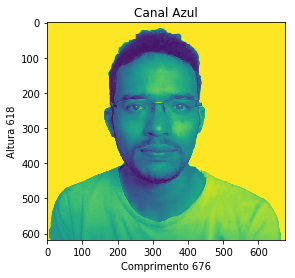

In [22]:
plt.title('Canal Azul')
plt.ylabel('Altura {}'.format(imagemDeExemplo.shape[0]))
plt.xlabel('Comprimento {}'.format(imagemDeExemplo.shape[1]))

plt.imshow(imagemDeExemplo[ : , : , 2])
salvaImagemDaMatriz(imagemDeExemplo[ : , : , 2])
plt.show()

In [29]:
quantidadeDeFiltros = 10
tamanhoDoFiltro = 8

In [24]:
imagemDeExemploVermelho= imagemDeExemplo[ : , : , 0]
imagemDeExemploVerde= imagemDeExemplo[ : , : , 1]
imagemDeExemploAzul= imagemDeExemplo[ : , : , 2]

In [30]:
cuboConvolucionalVermelho = obtemcuboConvolucional(imagemDeExemploVermelho,quantidadeDeFiltros,tamanhoDoFiltro)
cuboConvolucionalVermelhoMatriz = np.asarray(cuboConvolucionalVermelho)
salvaImagemGif('cuboConvolucionalMatrizVermelho.gif',cuboConvolucionalVermelho)

In [26]:
#cuboConvolucionalAzul = obtemcuboConvolucional(imagemDeExemploAzul,quantidadeDeFiltros,tamanhoDoFiltro)
#cuboConvolucionalAzulMatriz = np.asarray(cuboConvolucionalAzul)
#salvaImagemGif('cuboConvolucionalMatrizAzul.gif',cuboConvolucionalAzul)

In [27]:
#cuboConvolucionalVerde = obtemcuboConvolucional(imagemDeExemploVerde,quantidadeDeFiltros,tamanhoDoFiltro)
#cuboConvolucionalVerdeMatriz = np.asarray(cuboConvolucionalVerde)
#salvaImagemGif('cuboConvolucionalMatrizVerde.gif',cuboConvolucionalVerde)

In [28]:
cuboConvolucionalColorido = []
for i in range (quantidadeDeFiltros):
    cuboConvolucionalColorido[i].append(cuboConvolucionalVermelho[i])
    cuboConvolucionalColorido[i].append(cuboConvolucionalVerde[i])
    cuboConvolucionalColorido[i].append(cuboConvolucionalAzul[i])


cuboConvolucionalColoridoMatriz = np.asarray(cuboConvolucionalColorido)
salvaImagemGif('cuboConvolucionalMatrizColorido.gif',cuboConvolucionalColoridoMatriz)

IndexError: list index out of range

In [ ]:
CuboMaxPooling = obtemCuboMaxPooling (cuboConvolucionalVermelhoMatriz, 2, 1)
CuboMaxPoolingMatriz = np.asarray(CuboMaxPooling)


In [ ]:
#nao rodar ainda pois esta sendo testado a celula anterior (muito processamento)
#segundoCuboConvolucional = obtemcuboConvolucional(CuboMaxPoolingMatriz,20,4)
#segundoCuboConvolucionalMatriz = np.asarray(segundoCuboConvolucional)
#salvaConjuntoImagemGif(str(identificacaoDaImagem),segundoCuboConvolucionalMatriz)

In [ ]:
segundaCamadaConvolucional = 

In [ ]:

#print(segundoCuboConvolucional[0])

#imagemPool = executaMaxpooling(cuboConvolucional[0],2,1)

#salvaImagemDaMatriz(cuboConvolucionalMatriz.reshape(cuboConvolucionalMatriz.shape[-1] * quantidadeDeFiltros,cuboConvolucionalMatriz.shape[-2]))
#salvaImagemDaMatriz(CuboMaxPoolingMatriz.reshape(CuboMaxPoolingMatriz.shape[-1] * quantidadeDeFiltros,CuboMaxPoolingMatriz.shape[-2]))

#salvaImagemGif('cuboConvolucionalMatriz.gif',cuboConvolucionalMatriz)


# salvaImagemDaMatriz(cuboConvolucionalMatriz.reshape(240,24))
# salvaImagemDaMatriz(CuboMaxPoolingMatriz.reshape(230,23))